__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

In [2]:
import numpy as np

In [102]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])
y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [103]:
X1 = X[:, [0, 1]]                 # Перебираем все пары столбцов
X2 = X[:, [0, 2]]
X3 = X[:, [0, 3]]
X4 = X[:, [1, 2]]
X5 = X[:, [1, 3]]
X6 = X[:, [2, 3]]

ones = np.ones((X1.shape[0], 1))

X1 = np.hstack((ones, X1))        # Добавляем единицы для коэффициента b0
X2 = np.hstack((ones, X2))
X3 = np.hstack((ones, X3))
X4 = np.hstack((ones, X4))
X5 = np.hstack((ones, X5))
X6 = np.hstack((ones, X6))

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [105]:
lr1 = LinearRegression(fit_intercept=False).fit(X1, y)
lr2 = LinearRegression(fit_intercept=False).fit(X2, y)
lr3 = LinearRegression(fit_intercept=False).fit(X3, y)
lr4 = LinearRegression(fit_intercept=False).fit(X4, y)
lr5 = LinearRegression(fit_intercept=False).fit(X5, y)
lr6 = LinearRegression(fit_intercept=False).fit(X6, y)

In [106]:
z1 = X1.dot(lr1.coef_)             # Прогнозируем y на основе коэффициентов
z2 = X2.dot(lr2.coef_)
z3 = X3.dot(lr3.coef_)
z4 = X4.dot(lr4.coef_)
z5 = X5.dot(lr5.coef_)
z6 = X6.dot(lr6.coef_)

In [109]:
r2_1 = r2_score(y, z1)
r2_2 = r2_score(y, z2)
r2_3 = r2_score(y, z3)
r2_4 = r2_score(y, z4)
r2_5 = r2_score(y, z5)
r2_6 = r2_score(y, z6)

print(f'Наибольшее значение коэффициента детерминации: {max(r2_1, r2_2, r2_3, r2_4, r2_5, r2_6)}')
r2_2

Наибольшее значение коэффициента детерминации: 0.763424623879315


0.763424623879315

__Задача 2__

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

__Ответ__: 1

In [116]:
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [113]:
n = X2.shape[0]
m = X2.shape[1] - 1  # поскольку добавляли нулевой фактор

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [114]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

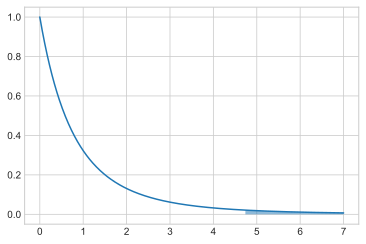

In [117]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [118]:
F = (r2_2 / k1) / ((1 - r2_2) / k2)
F

11.294439122922636

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

__Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.